In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import

In [2]:
df = pd.read_csv("Data/clean_data.csv", index_col=  "Index")

# Get dummies

In [3]:
df_dum = pd.get_dummies(df,drop_first=True)

# Split Data

In [4]:
X = df_dum.drop(["Price"], axis = 1)

In [5]:
y = df_dum["Price"]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [8]:
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)

In [10]:
X_test = scaler.transform(X_test)

# DeepLearning

In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

In [13]:
X.head(1)

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Alfa Romeo,Vehicle_brand_Audi,Vehicle_brand_BMW,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
Index,,,,,,,,,,,,,,,,,,,,,
116465,2015,125000.0,136.0,1598.0,5.0,48.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
model = Sequential()

model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))

#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [15]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=10)

Epoch 1/10
972/972 [==============================] - 3s 3ms/step - loss: 12754.1426 - val_loss: 7332.3320
Epoch 2/10
972/972 [==============================] - 2s 3ms/step - loss: 6856.5723 - val_loss: 6645.1963
Epoch 3/10
972/972 [==============================] - 2s 3ms/step - loss: 6493.0527 - val_loss: 6573.1665
Epoch 4/10
972/972 [==============================] - 3s 3ms/step - loss: 6334.5596 - val_loss: 6703.7964
Epoch 5/10
972/972 [==============================] - 3s 3ms/step - loss: 6265.5786 - val_loss: 6330.9106
Epoch 6/10
972/972 [==============================] - 3s 3ms/step - loss: 6124.1230 - val_loss: 6549.1353
Epoch 7/10
972/972 [==============================] - 3s 3ms/step - loss: 6099.7344 - val_loss: 6169.3569
Epoch 8/10
972/972 [==============================] - 2s 3ms/step - loss: 6011.8901 - val_loss: 6188.2505
Epoch 9/10
972/972 [==============================] - 2s 3ms/step - loss: 5969.5557 - val_loss: 6123.8779
Epoch 10/10
972/972 [========================

In [16]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

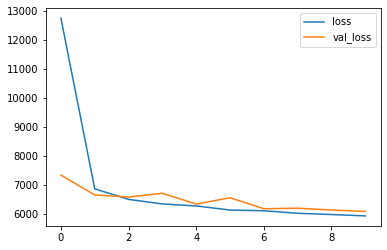

In [17]:
losses.plot()

In [18]:
preds = model.predict(X_test)

1667/1667 [==============================] - 2s 1ms/step


In [19]:
mean_absolute_error(y_test,preds) 

6076.456504081159

In [20]:
preds_df = pd.DataFrame(preds)

In [21]:
y_df = pd.DataFrame(y_test.values)

In [22]:
preds_df

,0
0,31369.828125
1,72350.062500
2,17001.167969
3,50897.496094
4,133630.000000
...,...
53315,25025.771484
53316,29652.050781
53317,23476.349609
53318,106400.578125


In [23]:
y_df

,0
0,29900
1,65500
2,14800
3,48000
4,121494
...,...
53315,26900
53316,27900
53317,20600
53318,89990


In [24]:
pd.concat([preds_df,y_df],axis = 1, ignore_index=True,join = "outer")

,0,1
0,31369.828125,29900
1,72350.062500,65500
2,17001.167969,14800
3,50897.496094,48000
4,133630.000000,121494
...,...,...
53315,25025.771484,26900
53316,29652.050781,27900
53317,23476.349609,20600
53318,106400.578125,89990


# Cars 100k max

In [215]:
df = pd.read_csv("Data/clean_data.csv", index_col=  "Index")

In [216]:
df = df[df["Price"] < 100000]

In [217]:
df_dum = pd.get_dummies(df,drop_first=True)

In [218]:
X = df_dum.drop(["Price"], axis = 1)

In [219]:
y = df_dum["Price"]

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [222]:
X_train = scaler.fit_transform(X_train)

In [223]:
X_test = scaler.transform(X_test)

In [240]:
model = Sequential()
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))

#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [241]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=10)

Epoch 1/10
431/431 [==============================] - 9s 14ms/step - loss: 9688.2178 - val_loss: 5273.3760
Epoch 2/10
431/431 [==============================] - 5s 11ms/step - loss: 5064.3179 - val_loss: 4949.8213
Epoch 3/10
431/431 [==============================] - 3s 8ms/step - loss: 4814.2729 - val_loss: 5053.4136
Epoch 4/10
431/431 [==============================] - 3s 8ms/step - loss: 4675.5903 - val_loss: 5118.5806
Epoch 5/10
431/431 [==============================] - 3s 8ms/step - loss: 4628.1138 - val_loss: 4905.9106
Epoch 6/10
431/431 [==============================] - 3s 8ms/step - loss: 4535.0620 - val_loss: 4719.2002
Epoch 7/10
431/431 [==============================] - 4s 8ms/step - loss: 4472.1221 - val_loss: 4704.9399
Epoch 8/10
431/431 [==============================] - 4s 8ms/step - loss: 4450.7529 - val_loss: 4593.4370
Epoch 9/10
431/431 [==============================] - 3s 8ms/step - loss: 4389.6602 - val_loss: 4489.6792
Epoch 10/10
431/431 [=======================

In [226]:
#4578.7266
#4543.4751
#4360.3477
#4478.7959
#4366.9976
#4250.8774
#4263.8779


In [227]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

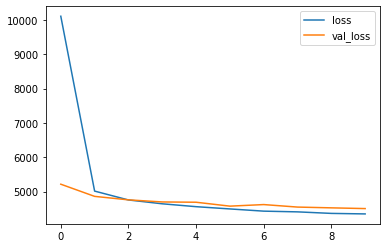

In [228]:
losses.plot()

In [229]:
preds = model.predict(X_test)

1476/1476 [==============================] - 5s 1ms/step


In [230]:
mean_absolute_error(y_test,preds) / y_test.mean()

0.12589246755529018

In [231]:
y_df = pd.DataFrame(y_test.values)
y_df

,0
0,7700
1,15900
2,22900
3,23500
4,74400
...,...
47198,50000
47199,32500
47200,28900
47201,10900


In [232]:
preds_df = pd.DataFrame(preds.round())
preds_df

,0
0,7836.0
1,10429.0
2,24994.0
3,21890.0
4,89125.0
...,...
47198,57649.0
47199,28794.0
47200,27722.0
47201,12214.0


In [233]:
df.drop("Price",axis = 1)

,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
Index,,,,,,,,,,,,,
116465,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,Manual,5.0,red,48.0
116466,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,Manual,5.0,green,35.0
116467,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,32.0
116468,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,Manual,5.0,silver,25.0
116469,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,silver,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,Used,Chevrolet,Spark,2010,200000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,silver,21.0
36981,Used,Chevrolet,Spark,2012,112644.0,68.0,1000.0,Gasoline,Front wheels,Manual,5.0,black,19.0
36984,Used,Chevrolet,Spark,2011,126000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,black,7.0


In [234]:
result_df = pd.concat([y_df,preds_df],axis = 1)

In [235]:
result_df.columns = ["Real Price", "Predicted Price"]

In [236]:
result_df["Difference"] = result_df["Real Price"] - result_df["Predicted Price"]

In [237]:
result_df["% of error"] = abs((result_df["Difference"]/result_df["Real Price"]) * 100).round(2)

In [238]:
result_df.head(10)

,Real Price,Predicted Price,Difference,% of error
0,7700,7836.0,-136.0,1.77
1,15900,10429.0,5471.0,34.41
2,22900,24994.0,-2094.0,9.14
3,23500,21890.0,1610.0,6.85
4,74400,89125.0,-14725.0,19.79
5,33000,28066.0,4934.0,14.95
6,24900,30034.0,-5134.0,20.62
7,6900,4901.0,1999.0,28.97
8,17200,24318.0,-7118.0,41.38
9,7900,9574.0,-1674.0,21.19


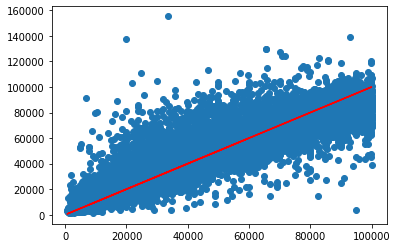

In [239]:
plt.scatter(y_test,preds)

# Real Value
plt.plot(y_test,y_test,'r')

In [125]:
from sklearn.metrics import r2_score

In [126]:
result_df["% of error"].mean()

17.39796157023918

In [127]:
r2_score(y_test,preds)

0.9107141414801165

In [128]:
df.iloc[1].values

array([11900, 'Used', 'Opel', 'Astra', 2006, 192547.0, 140.0, 1796.0,
       'Gasoline', 'Front wheels', 'Manual', 5.0, 'green', 35.0],
      dtype=object)

In [129]:
df.columns

Index(['Price', 'Condition', 'Vehicle_brand', 'Vehicle_model',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Doors_number', 'Colour',
       'Features'],
      dtype='object')

In [130]:
df.iloc[200].values

array([6900, 'Used', 'Opel', 'Astra', 2006, 214652.0, 105.0, 1598.0,
       'Gasoline', 'Front wheels', 'Manual', 5.0, 'black', 13.0],
      dtype=object)

In [131]:
car1 = [[11900,'Used', 'Opel', 'Astra', 2010, 214652.0, 105.0, 1598.0,'Gasoline', 'Front wheels', 'Manual', 5.0, 'black', 13.0],
       [ 0,'x', 'x', 'x', 1, 1, 1, 1.0,'x', 'x', 'x', 1.0, 'green', 1.0]]

In [132]:
car1_df = pd.DataFrame(car1)

In [133]:
car1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11900,Used,Opel,Astra,2010,214652.0,105.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,13.0
1,0,x,x,x,1,1.0,1.0,1.0,x,x,x,1.0,green,1.0


In [134]:
car1_df.drop(1,inplace=True)

In [135]:
car1_df.columns = df.columns

In [136]:
car1_df

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
0,11900,Used,Opel,Astra,2010,214652.0,105.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,13.0


In [137]:
car1_dummies = pd.get_dummies(car1_df)

In [138]:
car1_dummies

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Opel,Vehicle_model_Astra,Fuel_type_Gasoline,Drive_Front wheels,Transmission_Manual,Colour_black
0,11900,2010,214652.0,105.0,1598.0,5.0,13.0,1,1,1,1,1,1,1


In [139]:
car1_full_dummies = pd.concat([df_dum.iloc[[0,1]],car1_dummies]).fillna(0)

In [140]:
car1_full_dummies.iloc[[-1]]

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Alfa Romeo,Vehicle_brand_Audi,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
0,11900,2010,214652.0,105.0,1598.0,5.0,13.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
car1_full_dummies.iloc[[-1]]["Price"]

0    11900
Name: Price, dtype: int64

In [142]:
car1_full_dummies.drop("Price", axis = 1 , inplace=True)

In [143]:
car_to_predict = car1_full_dummies.iloc[[-1]].values

In [144]:
car_to_predict_s = scaler.transform(car_to_predict)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [145]:
model.predict(car_to_predict_s)

1/1 [==============================] - 0s 33ms/step


array([[17380.027]], dtype=float32)

# Without Features Column

In [172]:
df_without_features = df.drop("Features", axis = 1)

In [173]:
df_without_features_dum = pd.get_dummies(df_without_features,drop_first=True)

In [174]:
X = df_without_features_dum.drop("Price", axis = 1)

In [175]:
y = df_without_features_dum["Price"]

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [177]:
X_train = scaler.fit_transform(X_train)

In [178]:
X_test = scaler.transform(X_test)

In [184]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))

#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [185]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=10)

Epoch 1/10
861/861 [==============================] - 10s 7ms/step - loss: 9045.0537 - val_loss: 5240.9146
Epoch 2/10
861/861 [==============================] - 5s 6ms/step - loss: 5030.2837 - val_loss: 4992.2378
Epoch 3/10
861/861 [==============================] - 4s 4ms/step - loss: 4850.7891 - val_loss: 4851.8188
Epoch 4/10
861/861 [==============================] - 4s 4ms/step - loss: 4729.3911 - val_loss: 4782.1572
Epoch 5/10
861/861 [==============================] - 4s 5ms/step - loss: 4669.2563 - val_loss: 4752.8804
Epoch 6/10
861/861 [==============================] - 4s 4ms/step - loss: 4615.0469 - val_loss: 4771.0444
Epoch 7/10
861/861 [==============================] - 4s 4ms/step - loss: 4581.7153 - val_loss: 4870.4624
Epoch 8/10
861/861 [==============================] - 4s 4ms/step - loss: 4541.3057 - val_loss: 4604.9434
Epoch 9/10
861/861 [==============================] - 4s 4ms/step - loss: 4497.2139 - val_loss: 4709.8008
Epoch 10/10
861/861 [========================

In [181]:
preds = model.predict(X_test)

1476/1476 [==============================] - 2s 2ms/step


# Features Column is Usefull (a little bit)

In [182]:
mean_absolute_error(y_test,preds) / y_test.mean()

0.12743022983793004

# Predict price (100 most popular models)

In [188]:
df2 = pd.read_csv("Data/clean_data_most_popular_models.csv", index_col=  "Index")

In [205]:
df2["Vehicle_model"].value_counts()

Astra           5266
A4              4494
Seria 3         4289
Golf            4071
Passat          3968
                ... 
Grand Scenic     479
i40              450
Galaxy           444
Grande Punto     441
Seria 2          440
Name: Vehicle_model, Length: 99, dtype: int64

In [190]:
df2_dum = pd.get_dummies(df2)

In [191]:
df2_dum

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_New,Condition_Used,Vehicle_brand_Abarth,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
Index,,,,,,,,,,,,,,,,,,,,,
116465,42900,2015,125000.0,136.0,1598.0,5.0,48.000000,0,1,0,...,0,0,0,0,0,1,0,0,0,0
116466,11900,2006,192547.0,140.0,1796.0,5.0,35.000000,0,1,0,...,0,0,0,1,0,0,0,0,0,0
116467,25900,2010,119000.0,115.0,1598.0,5.0,32.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
116468,8400,2007,290000.0,100.0,1910.0,5.0,25.000000,0,1,0,...,0,0,0,0,0,0,1,0,0,0
116469,15999,2008,168779.0,115.0,1598.0,5.0,24.000000,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,22900,2009,182000.0,180.0,1368.0,3.0,30.000000,0,1,1,...,0,0,0,0,0,0,0,0,1,0
32,50000,2014,150100.0,180.0,1368.0,3.0,33.000000,0,1,1,...,0,0,0,0,0,1,0,0,0,0
46,38000,2009,79999.0,155.0,1368.0,3.0,29.000000,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [206]:
X = df2_dum.drop("Price",axis = 1)

In [207]:
y = df2_dum["Price"]

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [209]:
X_train = scaler.fit_transform(X_train)

In [210]:
X_test = scaler.transform(X_test)

In [213]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))

#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [214]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=10)

Epoch 1/10
720/720 [==============================] - 9s 7ms/step - loss: 11079.2129 - val_loss: 6213.7583
Epoch 2/10
720/720 [==============================] - 4s 6ms/step - loss: 5952.1392 - val_loss: 5704.3726
Epoch 3/10
720/720 [==============================] - 3s 4ms/step - loss: 5733.0381 - val_loss: 5555.4731
Epoch 4/10
720/720 [==============================] - 3s 4ms/step - loss: 5564.7407 - val_loss: 5617.3589
Epoch 5/10
720/720 [==============================] - 3s 4ms/step - loss: 5488.9697 - val_loss: 5639.1763
Epoch 6/10
720/720 [==============================] - 3s 4ms/step - loss: 5388.6162 - val_loss: 5371.6431
Epoch 7/10
720/720 [==============================] - 3s 4ms/step - loss: 5409.1753 - val_loss: 5367.3408
Epoch 8/10
720/720 [==============================] - 3s 4ms/step - loss: 5337.4229 - val_loss: 6191.5752
Epoch 9/10
720/720 [==============================] - 3s 4ms/step - loss: 5276.2031 - val_loss: 5488.2476
Epoch 10/10
720/720 [========================